From all mice, look at different onsets of investigations and the associated response

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from experiment_class import Experiment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# NAc
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac_csvs"
brain_region = '#FFAF00'

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc_csvs"
# brain_region = '#FFAF00'

trial.remove_initial_LED_artifact(t=30)
trial.remove_final_data_segment(t = 10)

trial.smooth_and_apply(window_len=int(trial.fs)*1)
trial.apply_ma_baseline_drift()
trial.compute_zscore(method = 'standard')
trial.verify_signal()

csv_file_name = f"{trial_folder}.csv"
csv_file_path = os.path.join(self.behavior_folder_path, csv_file_name)
trial.extract_manual_annotation_behaviors(csv_file_path)

In [3]:
experiment = Experiment(experiment_path, csv_base_path)

experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\n1-240507-080133\Notes.txt
read from t=0s to t=1573.39s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac\n2-240507-093913\Notes.txt
read from t=0s to t=1511.09s
Processing n1-240507-080133...
Processing n2-240507-093913...


In [4]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions)

Processing behaviors for n1-240507-080133...
Processing behaviors for n2-240507-093913...


In [5]:
experiment.compute_all_da_metrics(
    use_fractional=False, 
    max_bout_duration=4, 
    use_adaptive=False, 
    peak_fall_fraction=0.3,
    allow_bout_extension=False,
    first=True
)

Computing DA metrics for n1-240507-080133 ...
Computing DA metrics for n2-240507-093913 ...
Computing DA metrics for n3-240507-115440 ...
Computing DA metrics for n4-240507-140651 ...
Computing DA metrics for n5-240821-085040 ...
Computing DA metrics for n6-240821-100116 ...
Computing DA metrics for n7-240821-114717 ...
Computing DA metrics for nn1-250115-052028 ...
Computing DA metrics for nn2-250115-054951 ...
Computing DA metrics for nn3-250115-064154 ...
Computing DA metrics for nn4-250115-072812 ...
Computing DA metrics for nn5-250114-083827 ...
Computing DA metrics for nn6-250114-093117 ...
Computing DA metrics for nn7-250114-100133 ...
Computing DA metrics for nn8-250114-103839 ...


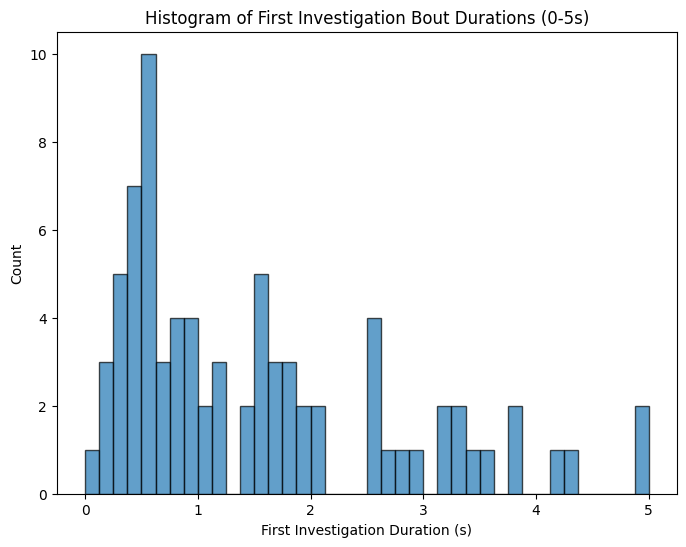

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Collect first investigation durations from all trials
first_investigation_durations = []

for trial_name, trial in experiment.trials.items():
    if hasattr(trial, 'behaviors') and not trial.behaviors.empty:
        # Filter only the first investigation per bout
        first_investigations = (
            trial.behaviors[trial.behaviors["Behavior"] == "Investigation"]
            .sort_values("Event_Start")
            .groupby("Bout", as_index=False)
            .first()
        )

        # Compute duration
        durations = first_investigations["Event_End"] - first_investigations["Event_Start"]
        first_investigation_durations.extend(durations.tolist())

# Convert to NumPy array for safety and filter between 0-5s
first_investigation_durations = np.array(first_investigation_durations)
filtered_durations = first_investigation_durations[
    (first_investigation_durations >= 0) & (first_investigation_durations <= 5)
]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(filtered_durations, bins=40, range=(0, 5), edgecolor='black', alpha=0.7)
plt.xlabel("First Investigation Duration (s)")
plt.ylabel("Count")
plt.title("Histogram of First Investigation Bout Durations (0-5s)")
plt.show()


In [7]:
for trial_name, trial in experiment.trials.items():
    if hasattr(trial, 'behaviors') and not trial.behaviors.empty:
        df = trial.behaviors
        # print(df)
        # Copy old metrics into new columns
        df["OG_AUC"]            = df["AUC"]
        df["OG_Max Peak"]       = df["Max Peak"]
        df["OG_Time of Max Peak"] = df["Time of Max Peak"]
        df["OG_Mean Z-score"]   = df["Mean Z-score"]
        
        # Copy the old end times
        if "Original End" in df.columns:
            df["OG_Original End"] = df["Original End"]
        if "Adjusted End" in df.columns:
            df["OG_Adjusted End"] = df["Adjusted End"]

In [7]:
experiment.compute_all_da_metrics(
    use_fractional=False, 
    max_bout_duration=3, 
    use_adaptive=True, 
    peak_fall_fraction=0.5,
    allow_bout_extension=True,
    first=True
)

Computing DA metrics for n1-240507-080133 ...
Computing DA metrics for n2-240507-093913 ...


In [9]:
all_changed_rows = []

for trial_name, trial in experiment.trials.items():
    if hasattr(trial, 'behaviors') and not trial.behaviors.empty:
        df = trial.behaviors
        # Identify rows where the new "Adjusted End" differs from the "Original End"
        changed_df = df[df["Adjusted End"] != df["Original End"]].copy()
        
        if not changed_df.empty:
            # Insert subject name (or trial name) in the first column
            changed_df.insert(0, "Subject", trial.subject_name)
            all_changed_rows.append(changed_df)

if all_changed_rows:
    final_changed_df = pd.concat(all_changed_rows, ignore_index=True)
    final_changed_df.to_csv("adjusted_end_changes.csv", index=False)
    print("Saved rows with changed end times (plus original metrics) to adjusted_end_changes.csv")
else:
    print("No adjusted end times differ from the original end times.")

Saved rows with changed end times (plus original metrics) to adjusted_end_changes.csv


In [10]:
final_changed_df.head()

,Subject,Bout,Behavior,Event_Start,Event_End,Duration (s),AUC,Max Peak,Time of Max Peak,Mean Z-score,Original End,Adjusted End,OG_AUC,OG_Max Peak,OG_Time of Max Peak,OG_Mean Z-score,OG_Original End,OG_Adjusted End
0,n1,s1-1,Investigation,182.000,184.800,2.800,5.416181,1.513838,185.304019,0.883660,184.800,188.128293,1.705989,1.118747,184.799720,0.609229,184.800,184.800
1,n1,s1-2,Investigation,383.867,384.267,0.400,5.578763,2.641122,385.707533,1.144364,384.267,388.741194,-0.063123,0.009569,384.266396,-0.158038,384.267,384.267
2,n2,s1-2,Investigation,376.067,377.867,1.800,1.636603,1.149407,377.629893,0.634245,377.867,378.647340,0.965125,1.149407,377.629893,0.536374,377.867,377.867
3,n2,s2-1,Investigation,1358.867,1359.533,0.666,0.856529,0.863525,1360.038762,0.442635,1359.533,1360.801601,-0.027972,0.522379,1359.532496,-0.042132,1359.533,1359.533
4,n3,s1-1,Investigation,190.333,231.067,40.734,5.507158,2.572328,209.707004,0.271858,231.067,210.591740,2.468544,2.572328,209.707004,0.060590,231.067,231.067


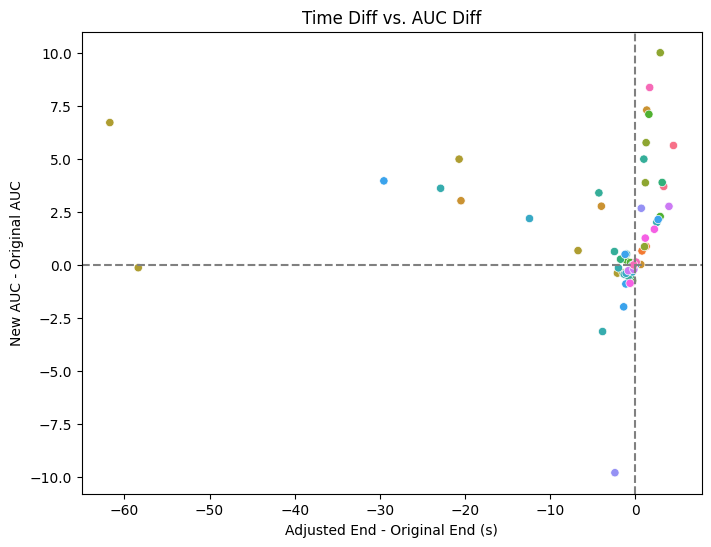

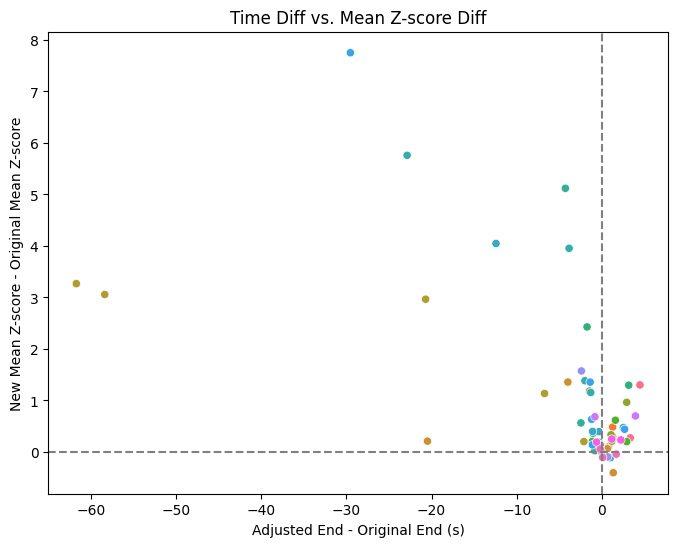

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create difference columns
#    - time_diff < 0 => bout got shorter
#    - time_diff > 0 => bout got longer
final_changed_df["time_diff"] = final_changed_df["Adjusted End"] - final_changed_df["Original End"]
final_changed_df["auc_diff"] = final_changed_df["AUC"] - final_changed_df["OG_AUC"]
final_changed_df["mean_diff"] = final_changed_df["Mean Z-score"] - final_changed_df["OG_Mean Z-score"]

# 2. Plot time_diff vs. auc_diff
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_changed_df, x="time_diff", y="auc_diff", hue="Subject")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Time Diff vs. AUC Diff")
plt.xlabel("Adjusted End - Original End (s)")
plt.ylabel("New AUC - Original AUC")
plt.legend([], [], frameon=False)  # Remove legend

plt.show()

# 3. Plot time_diff vs. mean_diff
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_changed_df, x="time_diff", y="mean_diff", hue="Subject")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Time Diff vs. Mean Z-score Diff")
plt.xlabel("Adjusted End - Original End (s)")
plt.ylabel("New Mean Z-score - Original Mean Z-score")
plt.legend([], [], frameon=False)  # Remove legend

plt.show()


In [12]:
# Grab associated DA levels for each investigtation. Look at first investigation DA. 
# provides area under the curve, max peak height, max z-scored ΔF/F, and the time at which the max ΔF/F value occurs.

In [13]:
# Look at DA for super long investigation bouts. See what's up. Look at DA for all investigations. See if there's a difference between the two

In [14]:
# This is looking at NAc, look at mPFC too

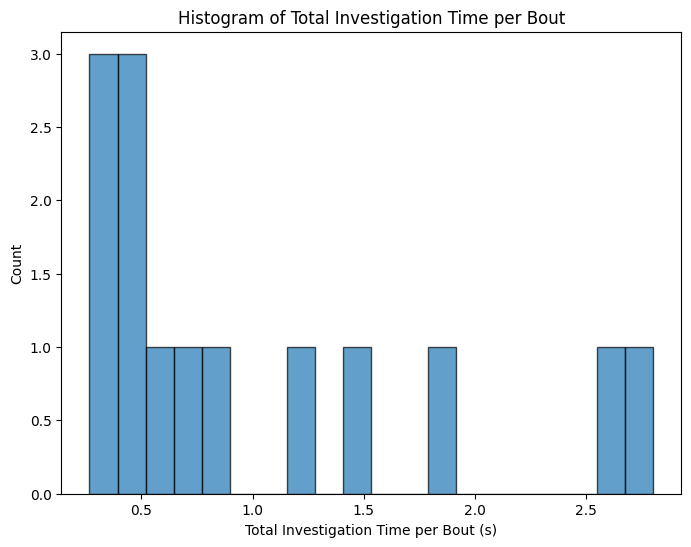

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect investigation data from all trials
investigation_data = []

for trial_name, trial in experiment.trials.items():
    if hasattr(trial, 'behaviors') and not trial.behaviors.empty:
        # Add subject information if missing
        if "Subject" not in trial.behaviors.columns:
            trial.behaviors["Subject"] = trial_name  # Assign trial name as Subject

        # Filter only "Investigation" behaviors
        investigation_df = trial.behaviors[trial.behaviors["Behavior"] == "Investigation"].copy()

        # Ensure "Duration (s)" exists, or calculate it
        if "Duration (s)" not in investigation_df.columns:
            investigation_df["Duration (s)"] = investigation_df["Event_End"] - investigation_df["Event_Start"]

        # Group by Subject and Bout to compute total investigation time
        grouped = (
            investigation_df
            .groupby(["Subject", "Bout"], as_index=False)
            .agg(Total_Investigation_Time=("Duration (s)", "sum"))  # Total time spent investigating
        )

        # Append to list
        investigation_data.append(grouped)

# Concatenate results from all trials into one DataFrame
if investigation_data:
    investigation_stats = pd.concat(investigation_data, ignore_index=True)
else:
    investigation_stats = pd.DataFrame(columns=["Subject", "Bout", "Total invest"])

# Extract total investigation time per bout
total_investigation_times = investigation_stats["Total_Investigation_Time"]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(total_investigation_times, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Total Investigation Time per Bout (s)")
plt.ylabel("Count")
plt.title("Histogram of Total Investigation Time per Bout")
plt.show()
